<a href="https://colab.research.google.com/github/luizapessoa/curso-dados-do-zero/blob/main/firstanalysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importar bibliotecas
import pandas as pd # manipulção de dados
import numpy as np # operações numericas e vetoriais
import matplotlib.pyplot as plt # visualização
import seaborn as sns # gráficos estatisticos com estilo

In [6]:
#importando base de dados
from google.colab import files
uploaded = files.upload()

Saving dados_venda_empresa1.csv.csv to dados_venda_empresa1.csv (1).csv


In [7]:
# importando dados
df = pd.read_csv('dados_venda_empresa1.csv (1).csv')

In [8]:
# visualizando primeiras linhas do dataframe
print(df.head())

   data_venda          nome_cliente estado    nome_produto    categoria  \
0  2025-05-11   Dra, Mariana da Paz     BA           Leite    Alimentos   
1  2025-03-14       Marcela Rezende     BA          Feijão    Alimentos   
2  2025-04-18    Srta, Brenda Cunha     BA   Quebra-Cabeça   Brinquedos   
3  2025-02-09  Maria Clara Caldeira     BA  Fone de Ouvido  Eletrônicos   
4  2025-04-10   João Felipe Cardoso     BA        Carrinho   Brinquedos   

   quantidade preco_unitario  total_venda  quantidade_estoque  \
0           9       1.610,73     14496.57                 116   
1           7       2.406,94     16848.58                 131   
2           1       2.192,52      2192.52                 224   
3           2       2.008,93      4017.86                 201   
4           8         624,63      4997.04                 170   

  localizacao_estoque   ano  mes  dia  dia da semana  
0            C3-A2-B2  2025    5   11              1  
1            B2-A1-C2  2025    3   14           

conhecendo os dados

In [9]:
# estrutura do banco
print(f"seu dataset tem: {df.shape[0]} linhas e {df.shape[1]} colunas")

seu dataset tem: 200 linhas e 14 colunas


In [10]:
# nome das colunas
print(df.columns)

Index(['data_venda', 'nome_cliente', 'estado', 'nome_produto', 'categoria',
       'quantidade', 'preco_unitario', 'total_venda', 'quantidade_estoque',
       'localizacao_estoque', 'ano', 'mes', 'dia', 'dia da semana'],
      dtype='object')


In [11]:
# nome das colunas organizadas
print(df.columns.tolist())

['data_venda', 'nome_cliente', 'estado', 'nome_produto', 'categoria', 'quantidade', 'preco_unitario', 'total_venda', 'quantidade_estoque', 'localizacao_estoque', 'ano', 'mes', 'dia', 'dia da semana']


In [12]:
# verificar dados faltantes
dados_faltantes = df.isnull().sum()
print(dados_faltantes)

data_venda             0
nome_cliente           0
estado                 0
nome_produto           0
categoria              0
quantidade             0
preco_unitario         0
total_venda            0
quantidade_estoque     0
localizacao_estoque    0
ano                    0
mes                    0
dia                    0
dia da semana          0
dtype: int64


In [13]:
# resumo estatistico simples
print(df.describe())

       quantidade  total_venda  quantidade_estoque          ano         mes  \
count  200.000000    200.00000          200.000000   200.000000  200.000000   
mean     5.805000   8412.64690          162.870000  2024.850000    4.450000   
std      2.927426   6864.71105           81.097392     0.357967    3.488315   
min      1.000000     81.18000           11.000000  2024.000000    1.000000   
25%      3.000000   2630.60000           97.750000  2025.000000    2.000000   
50%      6.000000   6392.92000          169.000000  2025.000000    4.000000   
75%      8.000000  12998.90250          233.250000  2025.000000    5.000000   
max     10.000000  26662.59000          298.000000  2025.000000   12.000000   

              dia  dia da semana  
count  200.000000      200.00000  
mean    16.405000        4.05000  
std      8.609973        2.18894  
min      1.000000        1.00000  
25%     10.000000        2.00000  
50%     17.000000        4.00000  
75%     24.000000        6.00000  
max     

In [14]:
# verificar valores zerados em colunas numericas
df[['quantidade', 'preco_unitario', 'total_venda']].eq(0).sum()

,0
quantidade,0
preco_unitario,0
total_venda,0


operações básicas com python

In [15]:
# somar coluna
print(df['total_venda'].sum())

1682529.3800000001


In [16]:
# multiplicar colunas
df['total_venda'] = df['quantidade'] * df['preco_unitario']
print(df['total_venda'])

0      1.610,731.610,731.610,731.610,731.610,731.610,...
1      2.406,942.406,942.406,942.406,942.406,942.406,...
2                                               2.192,52
3                                       2.008,932.008,93
4       624,63624,63624,63624,63624,63624,63624,63624,63
                             ...                        
195             2.426,592.426,592.426,592.426,592.426,59
196                       158,02158,02158,02158,02158,02
197    1.733,911.733,911.733,911.733,911.733,911.733,...
198     1.224,691.224,691.224,691.224,691.224,691.224,69
199    1.491,661.491,661.491,661.491,661.491,661.491,...
Name: total_venda, Length: 200, dtype: object


In [17]:
# media da coluna quantidade
print(df['quantidade'].mean())

# ps: na media de 'total_venda' os dados estão no type object, dando erro no cálculo
# pesquisar depois sobre esse tema

5.805


In [18]:
# corrigir e converter a coluna 'preco_unitario'
df['preco_unitario'] = (
    df['preco_unitario']
    .astype(str)
    .str.replace('.', '', regex= False)
    .str.replace(',', '.', regex= False)
)

# converter para float
df['preco_unitario'] = pd.to_numeric(df['preco_unitario'], errors= 'coerce')

# converter quantidade, se necessário
df['quantidade'] = pd.to_numeric(df['quantidade'], errors= 'coerce')

# mulltiplicar
df['total_venda'] = df['quantidade'] * df['preco_unitario']

# verificar tipo float
print(df['total_venda'].dtype)

# media da coluna quantidade
print(df['quantidade'].mean())



float64
5.805


filtros

In [ ]:
# filtrar itens da categoria Eletronicos
print(df[df['categoria'] == 'Eletrônicos'])


     data_venda              nome_cliente estado    nome_produto    categoria  \
3    2025-02-09      Maria Clara Caldeira     BA  Fone de Ouvido  Eletrônicos   
5    2025-04-04             Alana Peixoto     BA  Fone de Ouvido  Eletrônicos   
8    2024-12-21                Davi Silva     BA          Tablet  Eletrônicos   
15   2025-04-10          Vicente Teixeira     BA  Fone de Ouvido  Eletrônicos   
19   2025-01-13             Daniela Rocha     BA        Notebook  Eletrônicos   
20   2025-03-16           Nathan Teixeira     BA          Tablet  Eletrônicos   
22   2024-12-19      Sr, Benício da Cunha     BA         Monitor  Eletrônicos   
25   2025-01-22               Ian Pereira     BA  Fone de Ouvido  Eletrônicos   
35   2024-12-27            Thales Pereira     BA  Fone de Ouvido  Eletrônicos   
43   2025-05-27        Davi Lucca Cardoso     MG      Smartphone  Eletrônicos   
44   2024-12-22         Emanuelly Correia     MG      Smartphone  Eletrônicos   
49   2025-01-03     Luiz Hen

In [ ]:
# filtro composto ou combinado
print(df[(df['categoria'] == 'Eletrônicos') & (df['quantidade'] > 3)])


     data_venda              nome_cliente estado    nome_produto    categoria  \
5    2025-04-04             Alana Peixoto     BA  Fone de Ouvido  Eletrônicos   
8    2024-12-21                Davi Silva     BA          Tablet  Eletrônicos   
15   2025-04-10          Vicente Teixeira     BA  Fone de Ouvido  Eletrônicos   
20   2025-03-16           Nathan Teixeira     BA          Tablet  Eletrônicos   
22   2024-12-19      Sr, Benício da Cunha     BA         Monitor  Eletrônicos   
25   2025-01-22               Ian Pereira     BA  Fone de Ouvido  Eletrônicos   
35   2024-12-27            Thales Pereira     BA  Fone de Ouvido  Eletrônicos   
49   2025-01-03     Luiz Henrique Pereira     MG      Smartphone  Eletrônicos   
59   2025-04-04      Dra, Catarina Castro     PE          Tablet  Eletrônicos   
61   2025-03-07               Clara Viana     PE         Monitor  Eletrônicos   
67   2025-05-28      Luiz Gustavo Freitas     PE         Monitor  Eletrônicos   
79   2025-05-24            L

agrupamentos group by

In [ ]:
# media de quantidade vendida por categoria
print(df.groupby('categoria')['quantidade'].mean())

categoria
Alimentos      5.682927
Brinquedos     5.590909
Eletrônicos    6.694444
Móveis         5.361111
Vestuário      5.767442
Name: quantidade, dtype: float64


In [ ]:
# soma de quantidade vendida por categoria
print(df.groupby('categoria')['quantidade'].sum())

categoria
Alimentos      233
Brinquedos     246
Eletrônicos    241
Móveis         193
Vestuário      248
Name: quantidade, dtype: int64


In [ ]:
# múltiplas estatisticas por categoria
print(df.groupby('categoria')['quantidade'].agg(['mean', 'sum', 'count', 'max', 'min']))


                 mean  sum  count  max  min
categoria                                  
Alimentos    5.682927  233     41   10    1
Brinquedos   5.590909  246     44   10    1
Eletrônicos  6.694444  241     36   10    1
Móveis       5.361111  193     36   10    1
Vestuário    5.767442  248     43   10    1


gráficos

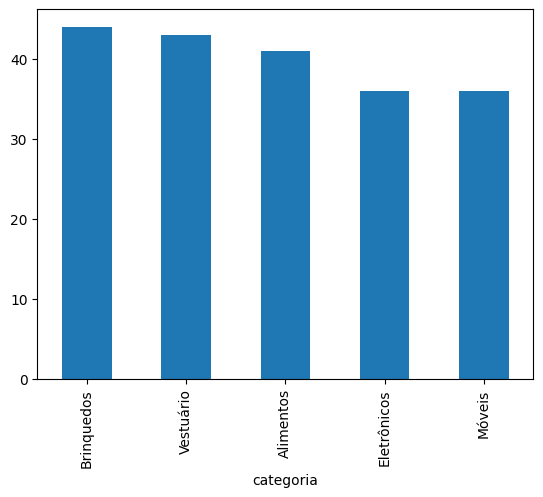

In [19]:
# grafico simpes de barras
df['categoria'].value_counts().plot(kind= 'bar')
plt.show()

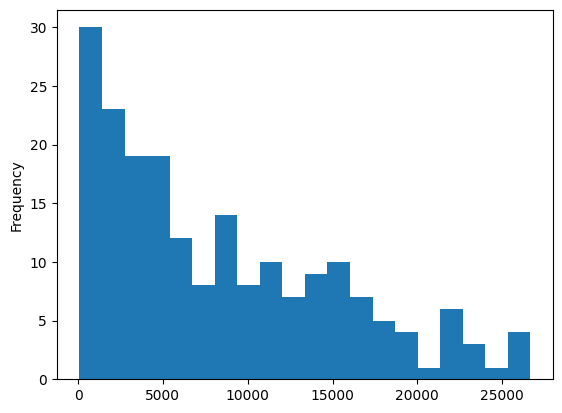

In [20]:
# histograma de distribuição dos valores de venda 'total_venda'
df['total_venda'].plot(kind= 'hist', bins = 20)
plt.show()

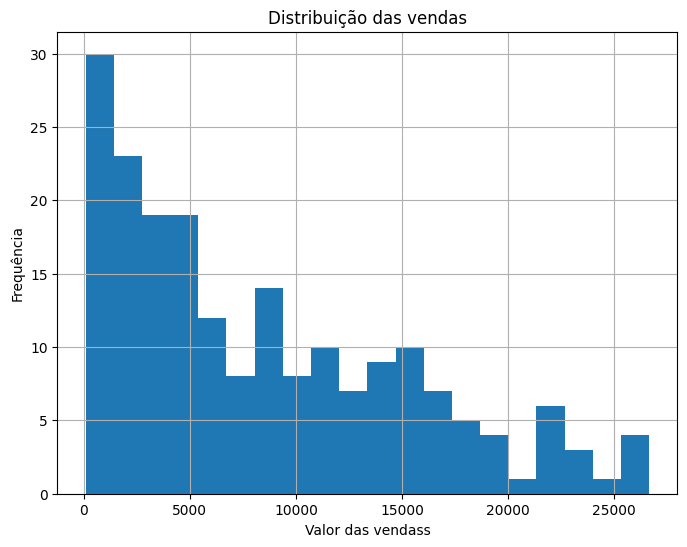

In [23]:
# versao 2 do histograma
plt.figure(figsize =(8,6))
df['total_venda'].hist(bins=20)
plt.title('Distribuição das vendas')
plt.xlabel('Valor das vendass')
plt.ylabel('Frequência')
plt.show()


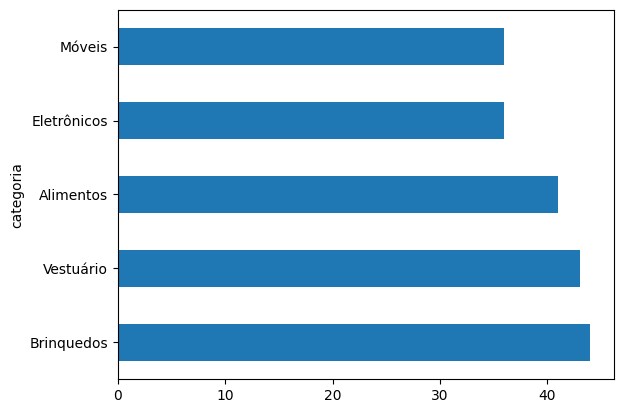

In [24]:
# gráfico de barras horizontais com o 'total_venda'
df['categoria'].value_counts().plot(kind= 'barh')
plt.show()

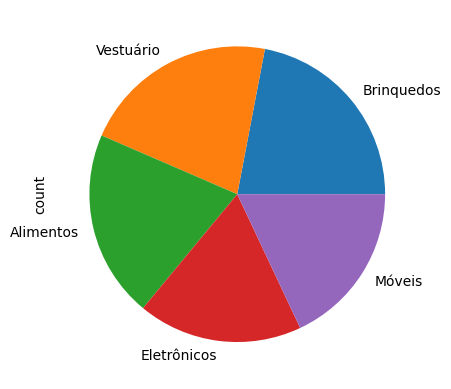

In [25]:
# gráfico de pizza com o 'total_venda'
df['categoria'].value_counts().plot(kind= 'pie')
plt.show()

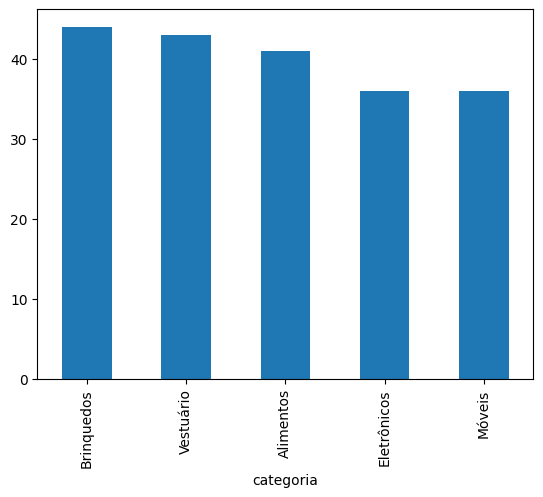

In [27]:
# gráfico de area com o 'total_venda'
df['categoria'].value_counts().plot(kind= 'bar')
plt.show()

criando nova coluna: cliente vip ou comum

In [28]:
# criar uma nova coluna status do cliente
df['status_cliente'] = np.where(df['total_venda'] > 10000, 'cliente vip', 'cliente comum')


In [30]:
# nome das colunas organizadas
print(df.head())

   data_venda          nome_cliente estado    nome_produto    categoria  \
0  2025-05-11   Dra, Mariana da Paz     BA           Leite    Alimentos   
1  2025-03-14       Marcela Rezende     BA          Feijão    Alimentos   
2  2025-04-18    Srta, Brenda Cunha     BA   Quebra-Cabeça   Brinquedos   
3  2025-02-09  Maria Clara Caldeira     BA  Fone de Ouvido  Eletrônicos   
4  2025-04-10   João Felipe Cardoso     BA        Carrinho   Brinquedos   

   quantidade  preco_unitario  total_venda  quantidade_estoque  \
0           9         1610.73     14496.57                 116   
1           7         2406.94     16848.58                 131   
2           1         2192.52      2192.52                 224   
3           2         2008.93      4017.86                 201   
4           8          624.63      4997.04                 170   

  localizacao_estoque   ano  mes  dia  dia da semana status_cliente  
0            C3-A2-B2  2025    5   11              1    cliente vip  
1           

trabalhando com datas

In [31]:
# garantir que as informações de data estão em formato datetime
df['data_venda'] = pd.to_datetime(df['data_venda'])

In [32]:
# extraindo informações de datatime
df['ano_venda'] = df['data_venda'].dt.year
df['mes_venda'] = df['data_venda'].dt.month
df['dia_venda'] = df['data_venda'].dt.day
df['dia_da_semana'] = df['data_venda'].dt.dayofweek

análise de oportunidades

In [33]:
# qual o total de vendas?
print(df['total_venda'].sum())

1682529.3800000001


In [34]:
# qual a media de vendas?
print(df['total_venda'].mean())

8412.6469


In [37]:
# qual categoria é a mais vendida?
print(df.groupby('categoria')['total_venda'].sum())

categoria
Alimentos      378777.27
Brinquedos     331006.07
Eletrônicos    322217.60
Móveis         286853.41
Vestuário      363675.03
Name: total_venda, dtype: float64


In [36]:
# qual a maior venda individual?
print(df['total_venda'].max())

26662.590000000004


análise final

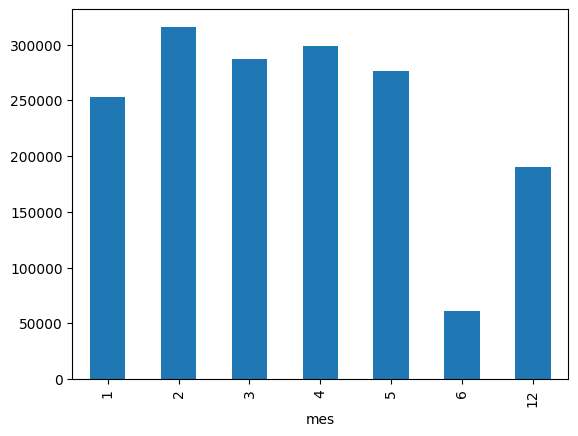

In [40]:
# gráfico de vendas totais por mês
df.groupby('mes')['total_venda'].sum().plot(kind= 'bar')
plt.show()

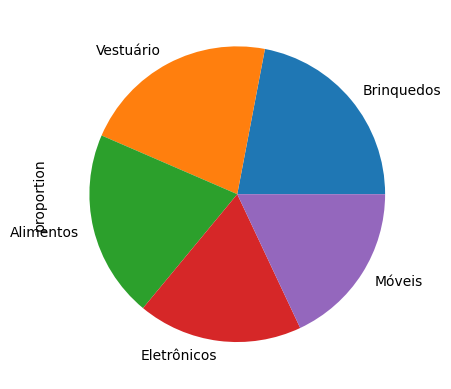

In [41]:
# gráfico de pizza do percentual de vendas por categoria
df['categoria'].value_counts(normalize= True).plot(kind= 'pie')
plt.show()

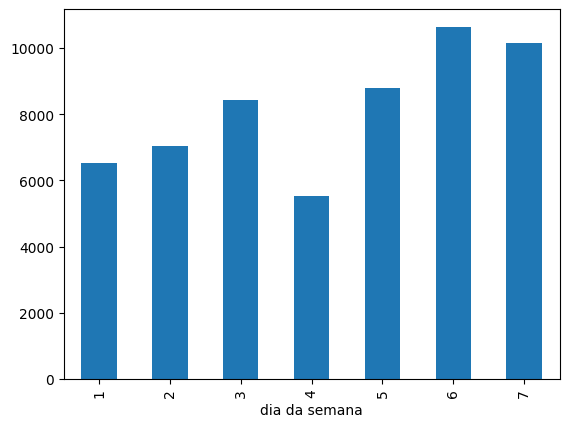

In [47]:
# media de vendas por dia da semana
df.groupby('dia da semana')['total_venda'].mean().plot(kind='bar')
plt.show()

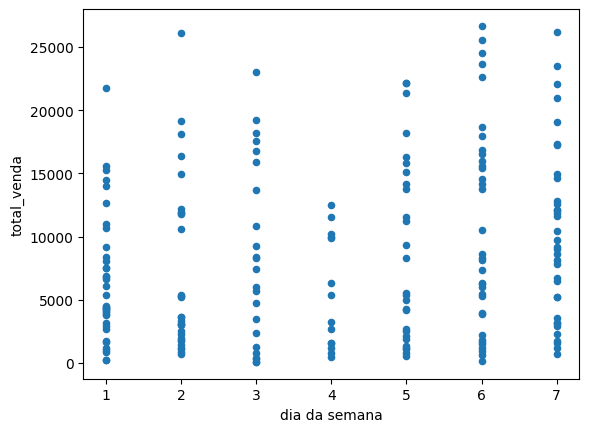

In [49]:
# gráfico de dispersão do dia da semana com o total de venda
df.plot(x= 'dia da semana', y= 'total_venda', kind= 'scatter')
plt.show()

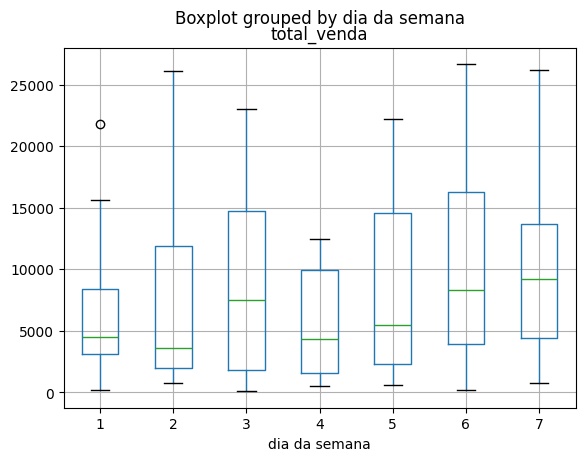

In [50]:
#baxplot da distribuição de venda por dia
df.boxplot(column='total_venda',by= 'dia da semana')
plt.show()

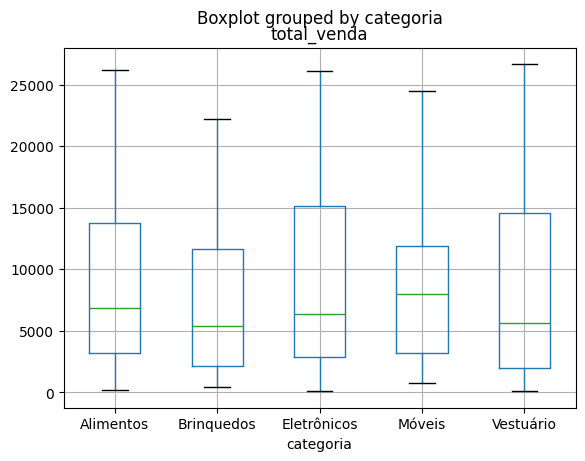

In [51]:
# boxplot por total de vendas por categoria
df.boxplot(column= 'total_venda', by= 'categoria')
plt.show()

In [52]:
# comprarando o valor medio de vende entre clientes vip e comum
print(df.groupby('status_cliente')['total_venda'].mean())


status_cliente
cliente comum     3941.469528
cliente vip      16191.270548
Name: total_venda, dtype: float64


In [53]:
# comparando valor total vendido por status do cliente
print(df.groupby('status_cliente')['total_venda'].sum())

status_cliente
cliente comum     500566.63
cliente vip      1181962.75
Name: total_venda, dtype: float64


In [55]:
# comparando as compras dos clientes vip e comuns por categoria
print(df.groupby(['status_cliente', 'categoria'])['total_venda'].sum())

status_cliente  categoria  
cliente comum   Alimentos       87508.75
                Brinquedos     122124.91
                Eletrônicos     82901.94
                Móveis         103620.06
                Vestuário      104410.97
cliente vip     Alimentos      291268.52
                Brinquedos     208881.16
                Eletrônicos    239315.66
                Móveis         183233.35
                Vestuário      259264.06
Name: total_venda, dtype: float64


conclusão de estratégia

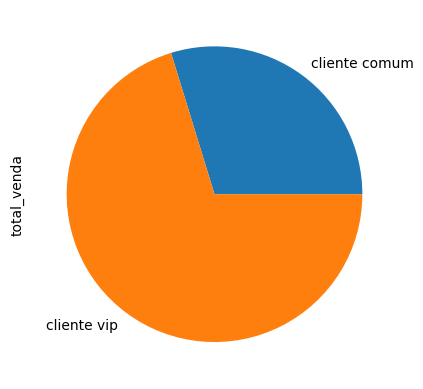

In [56]:
# gerar um gráfico de pizza comparando o total de venda dos vip e comum
df.groupby('status_cliente')['total_venda'].sum().plot(kind= 'pie')
plt.show()

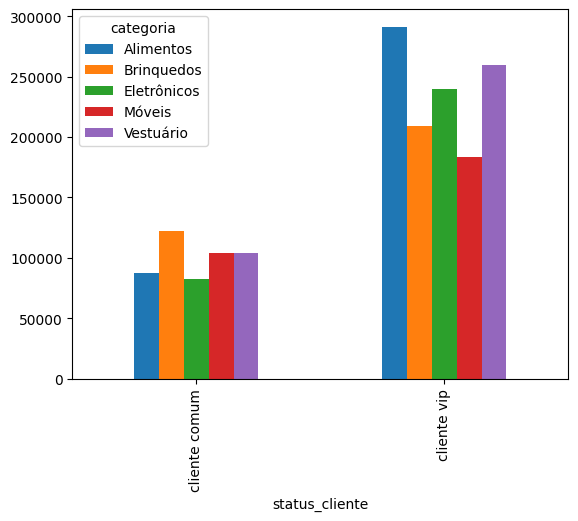

In [59]:
# gerar um gráfico de barras comparando as compras dos vip e comum por categoria
df.groupby(['status_cliente', 'categoria'])['total_venda'].sum().unstack().plot(kind= 'bar')
plt.show()